## Import libraries

In [1]:
import datetime
from datetime import datetime

import numpy as np
import pandas as pd

import gensim
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

import spacy 
from spacy import displacy

import matplotlib.pyplot as plt

import pickle
import os
import sys
sys.path.append(os.path.join(os.environ['PWD'],'scripts'))

from scrap import get_comments
from preprocess_text import preprocess_raw_comments

## Collect comments for January 2022

In [2]:
data_path = os.path.join(os.environ['PWD'],'data/january_comments.pkl')

if not os.path.isfile(data_path):
    start_date = datetime.strptime('2022-01-01',"%Y-%m-%d")
    end_date = datetime.strptime('2022-02-01',"%Y-%m-%d")
    
    raw_comments = get_comments(start_date, end_date) 
    
    pickling_on = open(data_path,"wb")
    pickle.dump(raw_comments, pickling_on)
    pickling_on.close()
    print('data pickled successfully!')
else:
    pickle_off = open(data_path, 'rb')
    raw_comments = pickle.load(pickle_off)
    print('data unpickled successfully!')

data unpickled successfully!


In [3]:
len(raw_comments)

453

## Preprocess textual data for analysis

In [4]:
data_path = os.path.join(os.environ['PWD'],'data/january_comments_processed.pkl')

if not os.path.isfile(data_path):

    preprocessed_text = preprocess_raw_comments(raw_comments) 
    
    pickling_on = open(data_path,"wb")
    pickle.dump(preprocessed_text, pickling_on)
    pickling_on.close()
    print('data pickled successfully!')
else:
    pickle_off = open(data_path, 'rb')
    preprocessed_text = pickle.load(pickle_off)
    print('data unpickled successfully!')

data unpickled successfully!


## Analyse rating scores

In [5]:
preprocessed_text['ratings']

,pos,neg
Career Growth,288,83
Work Satisfaction,297,80
Job Security,324,63
Skill Development,325,66
Work-Life Balance,326,62
Salary & Benefits,351,50
Company Culture,382,35


- Positive and Negative categories are highly negatively correlated
- Overall employees are mostly satisfied with company culture, salary and benefits
- Overall employees are mostly dissatisfied with career growth and work satisfaction

## Analyse comments

### Positive comments

In [6]:
data_path = os.path.join(os.environ['PWD'],'data/pos_comments_Lsi.pkl')

if not os.path.isfile(data_path):
    coh_values = []
    coh_models = []
    lsi_models = []
    for i in range(1,30):
    
        lsi_model = LsiModel(corpus=preprocessed_text['pos_corpus'], num_topics=i, 
                                             id2word=preprocessed_text['pos_dictionary'],chunksize=10)
    
        coh_model = CoherenceModel(model=lsi_model, texts=preprocessed_text['pos_texts'], 
                            dictionary=preprocessed_text['pos_dictionary'],coherence='c_v')

        coherence = coh_model.get_coherence()  # get coherence value
    
        coh_values.append(coherence)
        coh_models.append(coh_model)
        lsi_models.append(lsi_model) 
        
    pos_topic_models = {}
    pos_topic_models['coh_values'] = coh_values
    pos_topic_models['coh_models'] = coh_models
    pos_topic_models['lsi_models'] = lsi_models
    
    pickling_on = open(data_path,"wb")
    pickle.dump(pos_topic_models, pickling_on)
    pickling_on.close()
    print('data pickled successfully!')
else:
    pickle_off = open(data_path, 'rb')
    pos_topic_models = pickle.load(pickle_off)
    print('data unpickled successfully!')

data unpickled successfully!


Text(0.5, 1.0, 'Coherence')

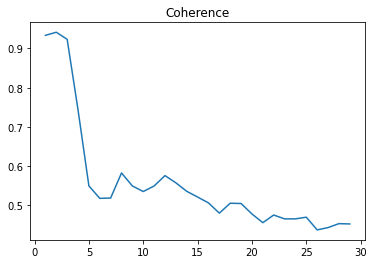

In [7]:
plt.plot(range(1,30), pos_topic_models['coh_values'])
plt.title("Coherence")

In [8]:
n_topics = 3
lsi_model = pos_topic_models['lsi_models'][n_topics-1]
dictionary = preprocessed_text['pos_dictionary']

In [9]:
data_frame = pd.DataFrame()
for i in range(n_topics):
    data_frame['Topic'+str(i)] = pd.Series(index=dictionary.values(),data=lsi_model.get_topics()[i]).sort_values(ascending=False).index.values

In [10]:
data_frame.iloc[:20]

,Topic0,Topic1,Topic2
0,resolve,shift,role
1,cx,time,process
2,email,holiday,literally
3,culture,company,shrinkage
4,great,home,growth
5,metric,nice_place,like
6,internal,peak,apply
7,organization,gift,process_think
8,ticket,free_time,think
9,ops_grpms,festival,pressure


From given words it seems to be problematic to extract topics.
- Employees from first group of comments discuss culture. 
- Employees from second group of comments discuss shift and holiday. 
- Employees from third group of comments discuss pressure and target. 

### Negative comments

In [11]:
data_path = os.path.join(os.environ['PWD'],'data/neg_comments_Lsi.pkl')

if not os.path.isfile(data_path):
    coh_values = []
    coh_models = []
    lsi_models = []
    for i in range(1,30):
    
        lsi_model = LsiModel(corpus=preprocessed_text['neg_corpus'], num_topics=i, 
                                             id2word=preprocessed_text['neg_dictionary'],chunksize=10)
    
        coh_model = CoherenceModel(model=lsi_model, texts=preprocessed_text['neg_texts'], 
                            dictionary=preprocessed_text['neg_dictionary'],coherence='c_v')

        coherence = coh_model.get_coherence()  # get coherence value
    
        coh_values.append(coherence)
        coh_models.append(coh_model)
        lsi_models.append(lsi_model) 
        
    neg_topic_models = {}
    neg_topic_models['coh_values'] = coh_values
    neg_topic_models['coh_models'] = coh_models
    neg_topic_models['lsi_models'] = lsi_models
    
    pickling_on = open(data_path,"wb")
    pickle.dump(neg_topic_models, pickling_on)
    pickling_on.close()
    print('data pickled successfully!')
else:
    pickle_off = open(data_path, 'rb')
    neg_topic_models = pickle.load(pickle_off)
    print('data unpickled successfully!')

data unpickled successfully!


Text(0.5, 1.0, 'Coherence')

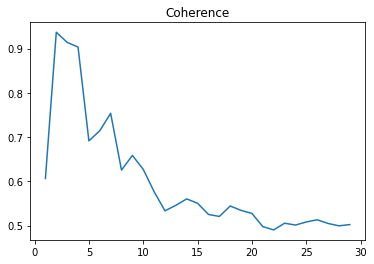

In [12]:
plt.plot(range(1,30), neg_topic_models['coh_values'])
plt.title("Coherence")

In [13]:
n_topics = 3
lsi_model = neg_topic_models['lsi_models'][n_topics-1]
dictionary = preprocessed_text['neg_dictionary']

data_frame = pd.DataFrame()
for i in range(n_topics):
    data_frame['Topic'+str(i)] = pd.Series(index=dictionary.values(),data=lsi_model.get_topics()[i]).sort_values(ascending=False).index.values
    
data_frame.iloc[:20]

,Topic0,Topic1,Topic2
0,reason,want,low
1,finally,change,let
2,follow,listen,day
3,company,customer,promotion
4,true,way,salary
5,team,make,year
6,happen,pay,politic
7,love,employee,manager
8,tell,manager,u
9,process,issue,hike


From given words it seems to be problematic to extract topics.
- Employees from first group of comments discuss process and interview. 
- Employees from second group of comments discuss compensation and pressure. 
- Employees from third group of comments discuss promotion and salary. 